In [ ]:
#DATA LOADING
import numpy as np  # Importing the numpy library for numerical operations
import pandas as pd  # Importing the pandas library for data manipulation
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
from sklearn.model_selection import train_test_split  # Importing the train_test_split function for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Importing preprocessing functions

# Loading the Iris dataset
iris = load_iris()

# Assigning the features and the target variables
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species of Iris flowers)

# Storing the names of the features and the target
feature_names = iris.feature_names  # Names of the features
target_names = iris.target_names  # Names of the Iris species


#DATA PROCESSING
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (X) and then transform X
# This standardises the features (mean=0, variance=1)
X_scaled = scaler.fit_transform(X)

# Reshape X_scaled to be suitable for 2D CNN (this is just an example, you need to reshape it according to your actual data)
X_scaled = X_scaled.reshape(-1, 2, 2, 1)

# Split the standardised features and target into training and testing sets
# 30% of the data will be used for testing, 70% for training
# random_state=42 ensures the splits generate are reproducible
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


#MODEL BUILDING
from tensorflow.keras.models import Sequential  # Importing the Sequential model class from Keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense  # Importing the Dense layer class from Keras

# Creating a Sequential model
model = Sequential([
    # Adding a 2D convolutional layer with 32 filters, kernel size of 3, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(2, 2, 1)),

    # Adding another 2D convolutional layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),

    # Adding another 2D convolutional layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),

    # Flattening the output from the convolutional layers so it can be fed into the dense layers
    Flatten(),

    # Adding a Dense output layer with 3 units (for the 3 classes) and softmax activation.
    Dense(3, activation='softmax')
])

# Compiling the model with Adam optimiser, sparse categorical crossentropy loss function,
# and a metric of accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#MODEL TRAINING
# Fit the model to the training data
# The model will train for 50 epochs, with a portion of the training data held back for validation
# The validation_split parameter tells Keras what fraction of the training data to use for validation
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

#MODEL EVALUATION
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print that
print(f"Test Accuracy: {accuracy*100:.2f}%")



#PREDICTIONS
# Use the model to predict the classes of the test data
predictions = model.predict(X_test)

# Convert the predictions (which are probabilities) to class labels
predicted_classes = np.argmax(predictions, axis=1)

print("Some predictions:")
# Print the first 5 predictions along with the actual classes
for i in range(5):
    print(f"Predicted: {target_names[predicted_classes[i]]}, Actual: {target_names[y_test[i]]}")


Epoch 1/50
3/3 [==============================] - 1s 131ms/step - loss: 1.0582 - accuracy: 0.6905 - val_loss: 0.9796 - val_accuracy: 0.7619
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.9174 - accuracy: 0.8333 - val_loss: 0.8355 - val_accuracy: 0.7619
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7402 - accuracy: 0.8333 - val_loss: 0.6652 - val_accuracy: 0.8095
Epoch 4/50
3/3 [==============================] - 0s 29ms/step - loss: 0.5665 - accuracy: 0.8214 - val_loss: 0.5255 - val_accuracy: 0.8571
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.4367 - accuracy: 0.8333 - val_loss: 0.4324 - val_accuracy: 0.8571
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.3612 - accuracy: 0.8214 - val_loss: 0.3884 - val_accuracy: 0.8571
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.3074 - accuracy: 0.8571 - val_loss: 0.3667 - val_accuracy: 0.9048
Epoch 8/50
3/3 [==========

In [ ]:
#DATA LOADING
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Loading the Iris dataset
iris = load_iris()

# Assigning the features and the target variables
X = iris.data
y = iris.target

# Storing the names of the features and the target
feature_names = iris.feature_names
target_names = iris.target_names

#DATA PROCESSING
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X_scaled to be suitable for 2D CNN
X_scaled = X_scaled.reshape(-1, 1, 2, 2)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Convert numpy arrays to PyTorch tensors
import torch
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

#MODEL BUILDING
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # Calculate input size for the first fully connected layer
        x = torch.randn(1, 2, 2).view(-1, 1, 2, 2)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 3)

    def convs(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # Flatten layer
        x = self.fc1(x)  # Output layer
        return x

model = Net()

# Compiling the model with Adam optimiser, cross entropy loss function,
# and a metric of accuracy
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

#MODEL TRAINING
for epoch in range(50):  # loop over the dataset multiple times
    optimizer.zero_grad()  # zero the parameter gradients
    outputs = model(X_train)  # forward pass
    loss = criterion(outputs, y_train)  # compute loss
    loss.backward()  # backward pass
    optimizer.step()  # optimize weights

#MODEL EVALUATION
outputs = model(X_test)
_, predicted = torch.max(outputs, 1)
correct = (predicted == y_test).sum().item()
accuracy = correct / y_test.size(0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

#PREDICTIONS
predictions = model(X_test)
_, predicted_classes = torch.max(predictions, 1)

print("Some predictions:")
for i in range(5):
    print(f"Predicted: {target_names[predicted_classes[i]]}, Actual: {target_names[y_test[i]]}")


Test Accuracy: 100.00%
Some predictions:
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor


In [ ]:
#DATA LOADING
import numpy as np  # Importing the numpy library for numerical operations
import pandas as pd  # Importing the pandas library for data manipulation
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
from sklearn.model_selection import train_test_split  # Importing the train_test_split function for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Importing preprocessing functions

# Loading the Iris dataset
iris = load_iris()

# Assigning the features and the target variables
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species of Iris flowers)

# Storing the names of the features and the target
feature_names = iris.feature_names  # Names of the features
target_names = iris.target_names  # Names of the Iris species


#DATA PROCESSING
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (X) and then transform X
# This standardizes the features (mean=0, variance=1)
X_scaled = scaler.fit_transform(X)

# Reshape X_scaled to be suitable for 1D CNN (this is just an example, you need to reshape it according to your actual data)
X_scaled = X_scaled.reshape(-1, X_scaled.shape[1], 1)

# Split the standardized features and target into training and testing sets
# 30% of the data will be used for testing, 70% for training
# random_state=42 ensures the splits generate are reproducible
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


#MODEL BUILDING
from tensorflow.keras.models import Sequential  # Importing the Sequential model class from Keras
from tensorflow.keras.layers import Conv1D, Flatten, Dense  # Importing the Dense layer class from Keras

# Creating a Sequential model
model = Sequential([
    # Adding a 1D convolutional layer with 32 filters, kernel size of 2, and ReLU activation
    Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)),

    # Adding another 1D convolutional layer with kernel size of 2
    Conv1D(64, 2, activation='relu'),

    # Adding another 1D convolutional layer with kernel size of 2
    Conv1D(128, 2, activation='relu'),

    # Flattening the output from the convolutional layers so it can be fed into the dense layers
    Flatten(),

    # Adding a Dense output layer with 3 units (for the 3 classes) and softmax activation.
    Dense(3, activation='softmax')
])

# Compiling the model with Adam optimizer, sparse categorical crossentropy loss function,
# and a metric of accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#MODEL TRAINING
# Fit the model to the training data
# The model will train for 50 epochs, with a portion of the training data held back for validation
# The validation_split parameter tells Keras what fraction of the training data to use for validation
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

#MODEL EVALUATION
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print that
print(f"Test Accuracy: {accuracy*100:.2f}%")



#PREDICTIONS
# Use the model to predict the classes of the test data
predictions = model.predict(X_test)

# Convert the predictions (which are probabilities) to class labels
predicted_classes = np.argmax(predictions, axis=1)

print("Some predictions:")
# Print the first 5 predictions along with the actual classes
for i in range(5):
    print(f"Predicted: {target_names[predicted_classes[i]]}, Actual: {target_names[y_test[i]]}")


Epoch 1/50
3/3 [==============================] - 1s 146ms/step - loss: 1.1034 - accuracy: 0.4286 - val_loss: 1.0336 - val_accuracy: 0.6190
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 1.0269 - accuracy: 0.5833 - val_loss: 0.9709 - val_accuracy: 0.8571
Epoch 3/50
3/3 [==============================] - 0s 27ms/step - loss: 0.9523 - accuracy: 0.7976 - val_loss: 0.9044 - val_accuracy: 0.8571
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 0.8790 - accuracy: 0.8095 - val_loss: 0.8314 - val_accuracy: 0.8095
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 0.8004 - accuracy: 0.8214 - val_loss: 0.7543 - val_accuracy: 0.8095
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.7141 - accuracy: 0.8214 - val_loss: 0.6740 - val_accuracy: 0.8095
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6282 - accuracy: 0.8214 - val_loss: 0.5965 - val_accuracy: 0.8571
Epoch 8/50
3/3 [==========

**Algorithm used: K-Nearest Neighbors (KNN)**

Test Accuracy: 100.00%
Some predictions:
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor


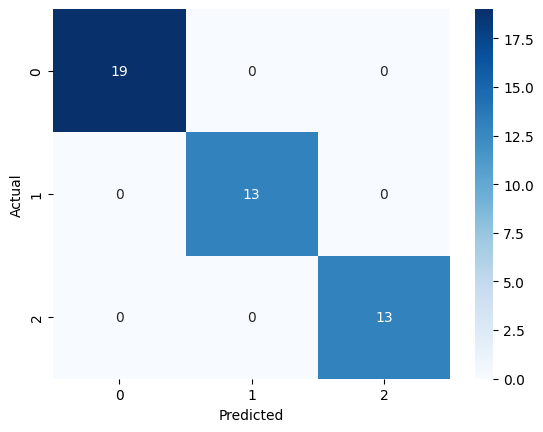

Mean Squared Error: 0.0
        Actual   Predicted
0   versicolor  versicolor
1       setosa      setosa
2    virginica   virginica
3   versicolor  versicolor
4   versicolor  versicolor
5       setosa      setosa
6   versicolor  versicolor
7    virginica   virginica
8   versicolor  versicolor
9   versicolor  versicolor
10   virginica   virginica
11      setosa      setosa
12      setosa      setosa
13      setosa      setosa
14      setosa      setosa
15  versicolor  versicolor
16   virginica   virginica
17  versicolor  versicolor
18  versicolor  versicolor
19   virginica   virginica
20      setosa      setosa
21   virginica   virginica
22      setosa      setosa
23   virginica   virginica
24   virginica   virginica
25   virginica   virginica
26   virginica   virginica
27   virginica   virginica
28      setosa      setosa
29      setosa      setosa
30      setosa      setosa
31      setosa      setosa
32  versicolor  versicolor
33      setosa      setosa
34      setosa      setosa
35  

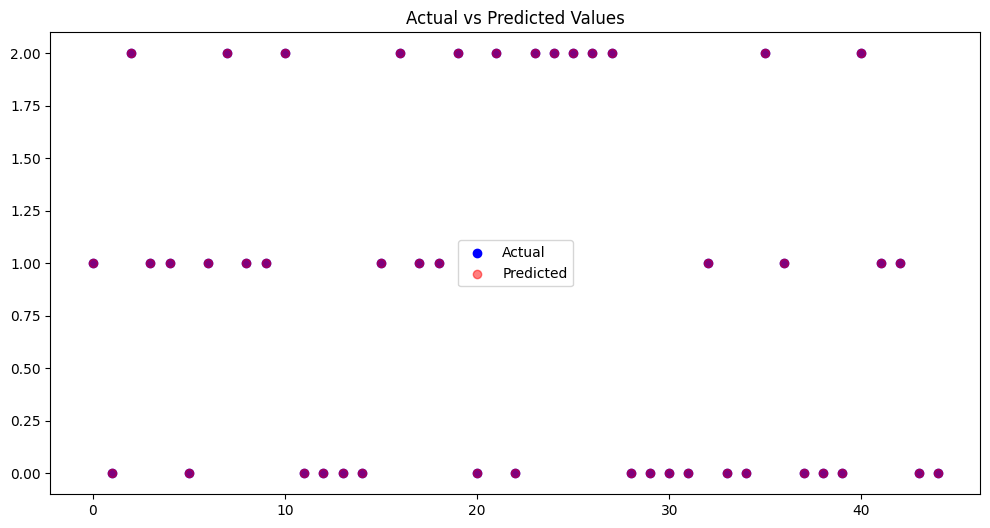

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from IPython.display import Markdown, display
import pandas as pd

# Function to display text in a box
def printmd(string):
    display(Markdown(string))

# Display the algorithm used in a text box
printmd("**Algorithm used: K-Nearest Neighbors (KNN)**")

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create a TensorDataset from the training data
train_dataset = TensorDataset(X_train, y_train)

# Create a DataLoader from the TensorDataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network model
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(50):
    for inputs, targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy*100:.2f}%')

# Print some predictions
print("Some predictions:")
for i in range(5):
    print(f"Predicted: {iris.target_names[predicted[i]]}, Actual: {iris.target_names[y_test[i]]}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error: {mse}")

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

# Map the numerical labels to their corresponding names
df['Actual'] = df['Actual'].map({i: name for i, name in enumerate(iris.target_names)})
df['Predicted'] = df['Predicted'].map({i: name for i, name in enumerate(iris.target_names)})

# Display the DataFrame
print(df)

# Convert the tensors back to numpy arrays for plotting
y_test = y_test.numpy()
predicted = predicted.numpy()

# Plot a graph comparing the actual and predicted values
plt.figure(figsize=(12, 6))

# Add a small offset to the x-coordinates of the actual values
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual', alpha=1)

# Add a small offset to the x-coordinates of the predicted values
plt.scatter(np.arange(len(predicted)), predicted, color='red', label='Predicted', alpha=0.5)

plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()


2/2 [==============================] - 0s 5ms/step


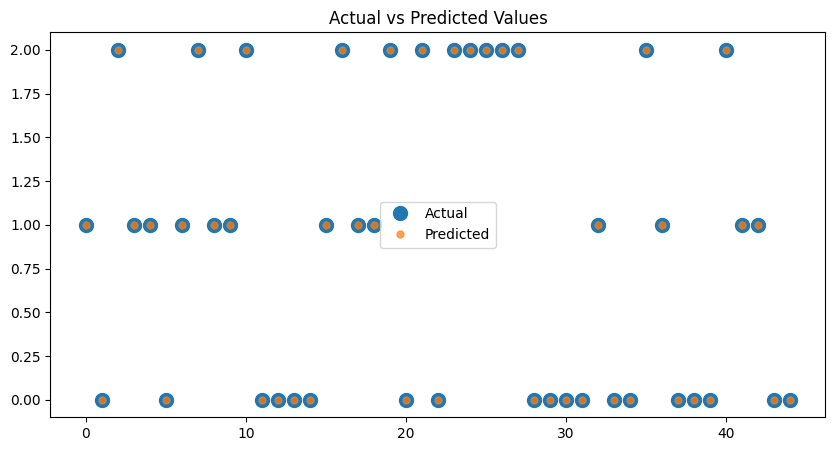

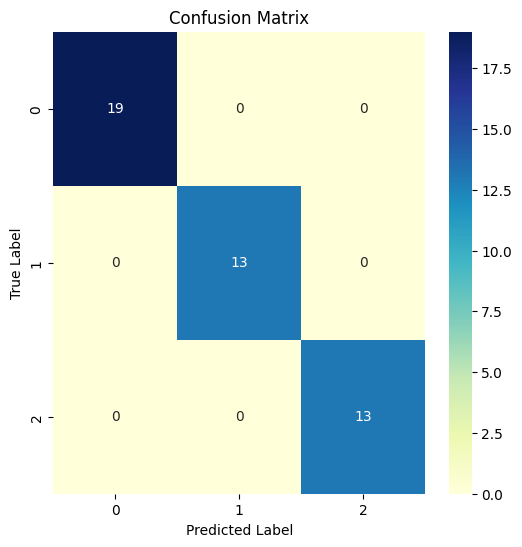

Mean Squared Error: 0.0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns

# Use the model to predict the classes of the test data
predictions = model.predict(X_test)

# Convert the predictions (which are probabilities) to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, 'o', markersize=10, label="Actual")
plt.plot(predicted_classes, 'o', markersize=5, label="Predicted", alpha=0.7)
plt.legend(loc='best')
plt.title('Actual vs Predicted Values')
plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Compute Mean Squared Error
mse = mean_squared_error(y_test, predicted_classes)
print(f"Mean Squared Error: {mse}")


In [ ]:
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_classes)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [ ]:
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Print out the details of the confusion matrix
print("\nDetails of the Confusion Matrix:")
print("True Positives (TP): ", np.diag(conf_matrix))
print("False Positives (FP): ", np.sum(conf_matrix, axis=0) - np.diag(conf_matrix))
print("False Negatives (FN): ", np.sum(conf_matrix, axis=1) - np.diag(conf_matrix))
print("True Negatives (TN): ", np.sum(conf_matrix) - (np.diag(conf_matrix) + np.sum(conf_matrix, axis=0) - np.diag(conf_matrix) + np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_classes)
print(f"\nMean Squared Error: {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Details of the Confusion Matrix:
True Positives (TP):  [19 13 13]
False Positives (FP):  [0 0 0]
False Negatives (FN):  [0 0 0]
True Negatives (TN):  [26 32 32]

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [ ]:
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Print out the details of the confusion matrix
print("\nDetails of the Confusion Matrix:")
print("True Positives (TP): ", np.diag(conf_matrix))
print("False Positives (FP): ", np.sum(conf_matrix, axis=0) - np.diag(conf_matrix))
print("False Negatives (FN): ", np.sum(conf_matrix, axis=1) - np.diag(conf_matrix))
print("True Negatives (TN): ", np.sum(conf_matrix) - (np.diag(conf_matrix) + np.sum(conf_matrix, axis=0) - np.diag(conf_matrix) + np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_classes)
print(f"\nMean Squared Error: {mse}")

# Print out the details of the MSE calculation
print("\nDetails of the Mean Squared Error Calculation:")
print("Actual values (y_test): ", y_test)
print("Predicted values: ", predicted_classes)
print("Squared differences: ", (y_test - predicted_classes)**2)
print("Mean Squared Error: ", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"\nRoot Mean Squared Error: {rmse}")

# Print out the details of the RMSE calculation
print("\nDetails of the Root Mean Squared Error Calculation:")
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Details of the Confusion Matrix:
True Positives (TP):  [19 13 13]
False Positives (FP):  [0 0 0]
False Negatives (FN):  [0 0 0]
True Negatives (TN):  [26 32 32]

Mean Squared Error: 0.0

Details of the Mean Squared Error Calculation:
Actual values (y_test):  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Predicted values:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Squared differences:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Mean Squared Error:  0.0

Root Mean Squared Error: 0.0

Details of the Root Mean Squared Error Calculation:
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0


**25 epoch**

In [1]:
#DATA LOADING
import numpy as np  # Importing the numpy library for numerical operations
import pandas as pd  # Importing the pandas library for data manipulation
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
from sklearn.model_selection import train_test_split  # Importing the train_test_split function for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Importing preprocessing functions

# Loading the Iris dataset
iris = load_iris()

# Assigning the features and the target variables
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species of Iris flowers)

# Storing the names of the features and the target
feature_names = iris.feature_names  # Names of the features
target_names = iris.target_names  # Names of the Iris species


#DATA PROCESSING
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (X) and then transform X
# This standardises the features (mean=0, variance=1)
X_scaled = scaler.fit_transform(X)

# Reshape X_scaled to be suitable for 2D CNN (this is just an example, you need to reshape it according to your actual data)
X_scaled = X_scaled.reshape(-1, 2, 2, 1)

# Split the standardised features and target into training and testing sets
# 30% of the data will be used for testing, 70% for training
# random_state=42 ensures the splits generate are reproducible
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


#MODEL BUILDING
from tensorflow.keras.models import Sequential  # Importing the Sequential model class from Keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense  # Importing the Dense layer class from Keras

# Creating a Sequential model
model = Sequential([
    # Adding a 2D convolutional layer with 32 filters, kernel size of 3, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(2, 2, 1)),

    # Adding another 2D convolutional layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),

    # Adding another 2D convolutional layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),

    # Flattening the output from the convolutional layers so it can be fed into the dense layers
    Flatten(),

    # Adding a Dense output layer with 3 units (for the 3 classes) and softmax activation.
    Dense(3, activation='softmax')
])

# Compiling the model with Adam optimiser, sparse categorical crossentropy loss function,
# and a metric of accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#MODEL TRAINING
# Fit the model to the training data
# The model will train for 25 epochs, with a portion of the training data held back for validation
# The validation_split parameter tells Keras what fraction of the training data to use for validation
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

#MODEL EVALUATION
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print that
print(f"Test Accuracy: {accuracy*100:.2f}%")



#PREDICTIONS
# Use the model to predict the classes of the test data
predictions = model.predict(X_test)

# Convert the predictions (which are probabilities) to class labels
predicted_classes = np.argmax(predictions, axis=1)

print("Some predictions:")
# Print the first 5 predictions along with the actual classes
for i in range(5):
    print(f"Predicted: {target_names[predicted_classes[i]]}, Actual: {target_names[y_test[i]]}")


Epoch 1/25
3/3 [==============================] - 3s 410ms/step - loss: 1.0606 - accuracy: 0.7024 - val_loss: 0.9887 - val_accuracy: 0.8571
Epoch 2/25
3/3 [==============================] - 0s 35ms/step - loss: 0.9192 - accuracy: 0.8214 - val_loss: 0.8482 - val_accuracy: 0.8095
Epoch 3/25
3/3 [==============================] - 0s 40ms/step - loss: 0.7574 - accuracy: 0.8214 - val_loss: 0.6859 - val_accuracy: 0.8095
Epoch 4/25
3/3 [==============================] - 0s 75ms/step - loss: 0.5914 - accuracy: 0.8214 - val_loss: 0.5413 - val_accuracy: 0.8095
Epoch 5/25
3/3 [==============================] - 0s 78ms/step - loss: 0.4555 - accuracy: 0.8333 - val_loss: 0.4441 - val_accuracy: 0.8571
Epoch 6/25
3/3 [==============================] - 0s 61ms/step - loss: 0.3684 - accuracy: 0.8571 - val_loss: 0.4049 - val_accuracy: 0.8571
Epoch 7/25
3/3 [==============================] - 0s 37ms/step - loss: 0.3139 - accuracy: 0.8452 - val_loss: 0.3718 - val_accuracy: 0.8571
Epoch 8/25
3/3 [==========

**100 epoch**

In [2]:
#DATA LOADING
import numpy as np  # Importing the numpy library for numerical operations
import pandas as pd  # Importing the pandas library for data manipulation
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
from sklearn.model_selection import train_test_split  # Importing the train_test_split function for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Importing preprocessing functions

# Loading the Iris dataset
iris = load_iris()

# Assigning the features and the target variables
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species of Iris flowers)

# Storing the names of the features and the target
feature_names = iris.feature_names  # Names of the features
target_names = iris.target_names  # Names of the Iris species


#DATA PROCESSING
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (X) and then transform X
# This standardises the features (mean=0, variance=1)
X_scaled = scaler.fit_transform(X)

# Reshape X_scaled to be suitable for 2D CNN (this is just an example, you need to reshape it according to your actual data)
X_scaled = X_scaled.reshape(-1, 2, 2, 1)

# Split the standardised features and target into training and testing sets
# 30% of the data will be used for testing, 70% for training
# random_state=42 ensures the splits generate are reproducible
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


#MODEL BUILDING
from tensorflow.keras.models import Sequential  # Importing the Sequential model class from Keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense  # Importing the Dense layer class from Keras

# Creating a Sequential model
model = Sequential([
    # Adding a 2D convolutional layer with 32 filters, kernel size of 3, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(2, 2, 1)),

    # Adding another 2D convolutional layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),

    # Adding another 2D convolutional layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),

    # Flattening the output from the convolutional layers so it can be fed into the dense layers
    Flatten(),

    # Adding a Dense output layer with 3 units (for the 3 classes) and softmax activation.
    Dense(3, activation='softmax')
])

# Compiling the model with Adam optimiser, sparse categorical crossentropy loss function,
# and a metric of accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#MODEL TRAINING
# Fit the model to the training data
# The model will train for 25 epochs, with a portion of the training data held back for validation
# The validation_split parameter tells Keras what fraction of the training data to use for validation
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

#MODEL EVALUATION
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print that
print(f"Test Accuracy: {accuracy*100:.2f}%")



#PREDICTIONS
# Use the model to predict the classes of the test data
predictions = model.predict(X_test)

# Convert the predictions (which are probabilities) to class labels
predicted_classes = np.argmax(predictions, axis=1)

print("Some predictions:")
# Print the first 5 predictions along with the actual classes
for i in range(5):
    print(f"Predicted: {target_names[predicted_classes[i]]}, Actual: {target_names[y_test[i]]}")


Epoch 1/100
3/3 [==============================] - 2s 187ms/step - loss: 1.0680 - accuracy: 0.4524 - val_loss: 0.9824 - val_accuracy: 0.7619
Epoch 2/100
3/3 [==============================] - 0s 44ms/step - loss: 0.9305 - accuracy: 0.8333 - val_loss: 0.8377 - val_accuracy: 0.7619
Epoch 3/100
3/3 [==============================] - 0s 39ms/step - loss: 0.7662 - accuracy: 0.8333 - val_loss: 0.6649 - val_accuracy: 0.7619
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.5797 - accuracy: 0.8214 - val_loss: 0.5214 - val_accuracy: 0.8095
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 0.4396 - accuracy: 0.8333 - val_loss: 0.4395 - val_accuracy: 0.8571
Epoch 6/100
3/3 [==============================] - 0s 37ms/step - loss: 0.3691 - accuracy: 0.8571 - val_loss: 0.4291 - val_accuracy: 0.8095
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.3162 - accuracy: 0.8571 - val_loss: 0.3896 - val_accuracy: 0.8095
Epoch 8/100
3/3 [==